In [ ]:
#importing weather data for Meiningen
import pandas as pd
import requests
# URL of the webpage containing JSON data
url = "http://139.174.11.24/data?dataset=weatherdataforcities&start=2019-01-01&end=2023-12-31&cityName=Meiningen"

# Fetch the data from the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse JSON data
    mein_data = response.json()

    # Convert the data to a DataFrame
    mein_df = pd.DataFrame.from_dict(mein_data , orient='index')

    # Reset the index to convert the timestamp to a column
    mein_df.reset_index(inplace=True)

else:
    print("Failed to fetch data. Status code:", response.status_code)





In [ ]:
mein_df.head()

,index,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,cityName
0,1546300800000,2019-01-01 00:00:00,6.2,3.5,83.0,0.0,0.0,240.0,7.9,15.0,1031.8,0.0,4.0,Meiningen
1,1546301700000,2019-01-01 01:00:00,5.8,3.6,86.0,0.0,0.0,230.0,6.8,12.0,1031.2,0.0,4.0,Meiningen
2,1546302600000,2019-01-01 02:00:00,5.6,3.1,84.0,0.0,0.0,210.0,7.9,15.0,1030.4,0.0,4.0,Meiningen
3,1546303500000,2019-01-01 03:00:00,6.0,3.0,81.0,0.0,0.0,220.0,9.7,26.0,1029.4,0.0,4.0,Meiningen
4,1546304400000,2019-01-01 04:00:00,6.2,3.0,80.0,0.0,0.0,240.0,8.6,21.0,1028.4,0.0,4.0,Meiningen


In [ ]:

# drop unwanted columns

new_mein = mein_df.drop(columns = ["index", "time","snow","cityName"])
new_mein
new_mein.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    43824 non-null  float64
 1   dwpt    43824 non-null  float64
 2   rhum    43824 non-null  float64
 3   prcp    43824 non-null  float64
 4   wdir    43824 non-null  float64
 5   wspd    43824 non-null  float64
 6   wpgt    43824 non-null  float64
 7   pres    43824 non-null  float64
 8   tsun    43742 non-null  float64
 9   coco    43822 non-null  float64
dtypes: float64(10)
memory usage: 3.3 MB


In [ ]:
new_mein.isnull().sum()

temp     0
dwpt     0
rhum     0
prcp     0
wdir     0
wspd     0
wpgt     0
pres     0
tsun    82
coco     2
dtype: int64

In [ ]:
new_mein[new_mein["coco"].isnull()]

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,coco
30097,12.0,11.7,98.0,0.0,150.0,9.4,13.0,1013.1,0.0,NaN
30098,12.3,12.0,98.0,0.0,160.0,8.6,16.0,1012.6,0.0,NaN


In [ ]:
missing_indices = [30097, 30098]

# Perform linear interpolation specifically for the given indices
new_mein.loc[missing_indices, 'coco'] = new_mein['coco'].interpolate(method='linear')[missing_indices]




In [ ]:
new_mein["coco"][missing_indices]

30097    4.333333
30098    4.666667
Name: coco, dtype: float64

In [ ]:
#Checking for null values
new_mein.isnull().sum()

temp     0
dwpt     0
rhum     0
prcp     0
wdir     0
wspd     0
wpgt     0
pres     0
tsun    82
coco     0
dtype: int64

In [ ]:
new_mein[new_mein["tsun"].isnull()].head(100)

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,coco
7619,4.3,0.4,76.0,0.0,140.0,15.5,27.0,1007.2,NaN,4.0
22376,17.7,9.8,60.0,0.0,40.0,5.4,10.0,1023.2,NaN,1.0
22377,17.3,8.4,56.0,0.0,30.0,9.7,16.7,1023.4,NaN,2.0
22378,17.8,10.2,61.0,0.0,350.0,10.1,19.0,1023.2,NaN,4.0
22979,24.7,11.6,44.0,0.0,320.0,9.3,20.4,1014.6,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...
23247,16.5,9.2,71.0,0.4,331.0,16.7,31.5,1011.7,NaN,17.0
23248,12.8,9.5,70.0,0.4,324.0,14.8,33.3,1011.8,NaN,18.0
23249,10.9,9.7,77.0,0.3,325.0,13.0,27.8,1012.1,NaN,18.0
23250,11.0,9.4,90.0,0.4,328.0,13.0,25.9,1012.5,NaN,18.0


In [ ]:
# find the percentage of missing values in each feature
new_mein.isnull().sum()/len(new_mein) *100

temp    0.000000
dwpt    0.000000
rhum    0.000000
prcp    0.000000
wdir    0.000000
wspd    0.000000
wpgt    0.000000
pres    0.000000
tsun    0.187112
coco    0.004564
dtype: float64

In [ ]:
#Using Linear Regression Imputation to fill missing values in the tsun feature
from sklearn.linear_model import LinearRegression

# seperate the null  values of the tsun feature
test =  new_mein[new_mein["tsun"].isnull()]
X_test = test.drop("tsun", axis = 1)

#Dropping the null values from the dataset
train = new_mein.dropna()
#Splitting the train data into target and feature
X_train= train.drop(columns = "tsun")
y_train = train["tsun"]

#Calling the linear regression model
lr = LinearRegression()
#Fitting the tranining data in to the model
lr.fit(X_train, y_train)
#Predicting the missing tsun values
y_pred = lr.predict(X_test)

#Replacing the missing values with the model prediction
new_mein.loc[new_mein.tsun.isnull(),"tsun"] = y_pred






In [ ]:
#Check if missing values still exists for the tsun feature
new_mein.isnull().sum()/len(new_mein) *100

temp    0.0
dwpt    0.0
rhum    0.0
prcp    0.0
wdir    0.0
wspd    0.0
wpgt    0.0
pres    0.0
tsun    0.0
coco    0.0
dtype: float64

In [ ]:
# Check if -99999 exists in all columns and print columns where it exists
columns_with_value = new_mein.apply(lambda col: col.name if -99999 in col.values else None).dropna()

if len(columns_with_value) > 0:
    print(f"The value '{-99999}' exists in the following columns:")
    for col in columns_with_value:
        print(col)
else:
    print(f"The value '{-99999}' does not exist in any column.")

The value '-99999' does not exist in any column.


In [ ]:
#Check if missing values still exists for the coco feature
new_mein.isnull().sum()/len(new_mein) *100


temp    0.0
dwpt    0.0
rhum    0.0
prcp    0.0
wdir    0.0
wspd    0.0
wpgt    0.0
pres    0.0
tsun    0.0
coco    0.0
dtype: float64

In [ ]:

new_mein.isnull().sum()

temp    0
dwpt    0
rhum    0
prcp    0
wdir    0
wspd    0
wpgt    0
pres    0
tsun    0
coco    0
dtype: int64

In [ ]:
new_mein.describe()

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,coco
count,43824.000000,43824.00000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,9.285038,4.70324,76.373859,0.073473,209.689166,10.987085,20.746732,1016.977665,11.356058,4.577811
std,7.863829,6.14833,18.922118,0.452388,91.889752,5.730464,11.040757,9.463484,20.963343,3.198184
min,-18.100000,-19.70000,13.000000,0.000000,0.000000,0.700000,2.000000,978.600000,-11.117983,1.000000
25%,3.000000,0.10000,64.000000,0.000000,160.000000,6.500000,12.000000,1011.400000,0.000000,3.000000
50%,8.700000,4.90000,81.000000,0.000000,190.000000,10.100000,19.000000,1017.300000,0.000000,4.000000
75%,15.000000,9.60000,92.000000,0.000000,290.000000,14.800000,27.000000,1022.900000,10.000000,7.000000
max,36.000000,20.40000,100.000000,30.400000,360.000000,45.400000,113.000000,1048.600000,60.000000,25.000000


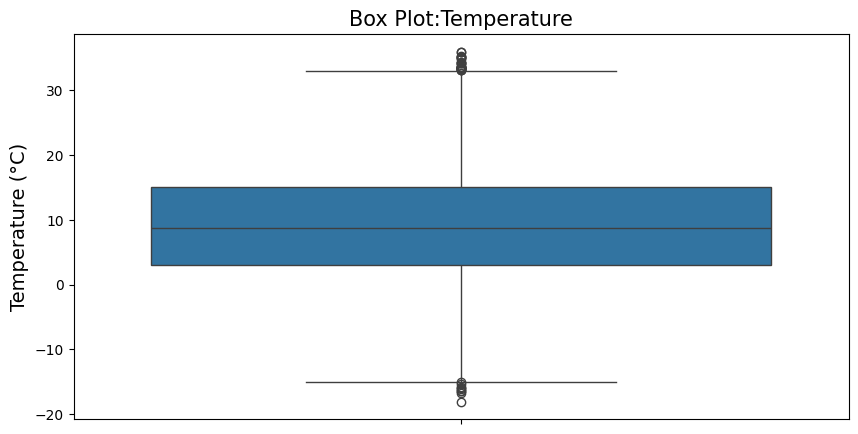

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(10,5))
sns.boxplot(new_mein.temp)
plt.title('Box Plot:Temperature', fontsize=15)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.show()

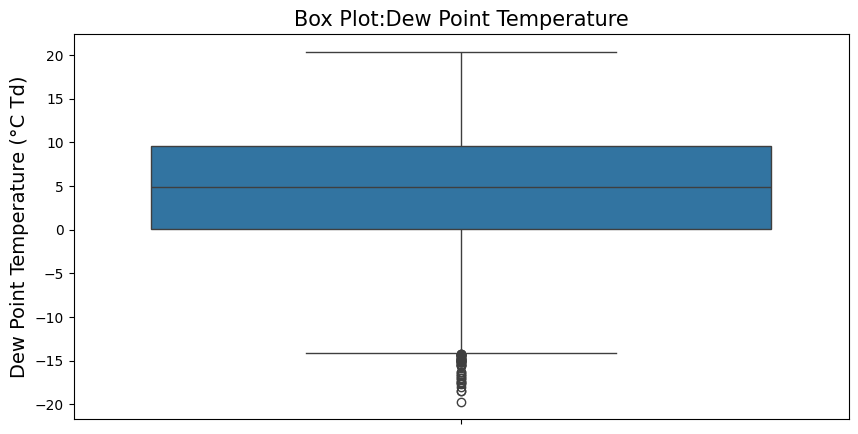

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(new_mein.dwpt)
plt.title('Box Plot:Dew Point Temperature', fontsize=15)
plt.ylabel('Dew Point Temperature (°C Td)', fontsize=14)
plt.show()

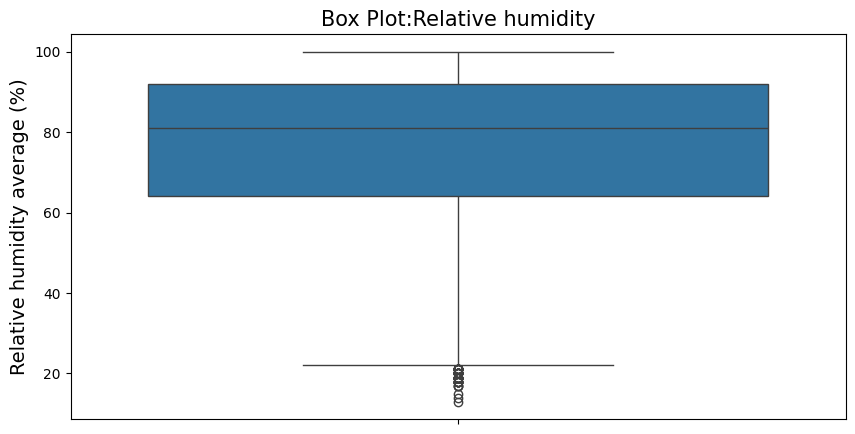

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(new_mein.rhum)
plt.title('Box Plot:Relative humidity', fontsize=15)
plt.ylabel('Relative humidity average (%)', fontsize=14)
plt.show()

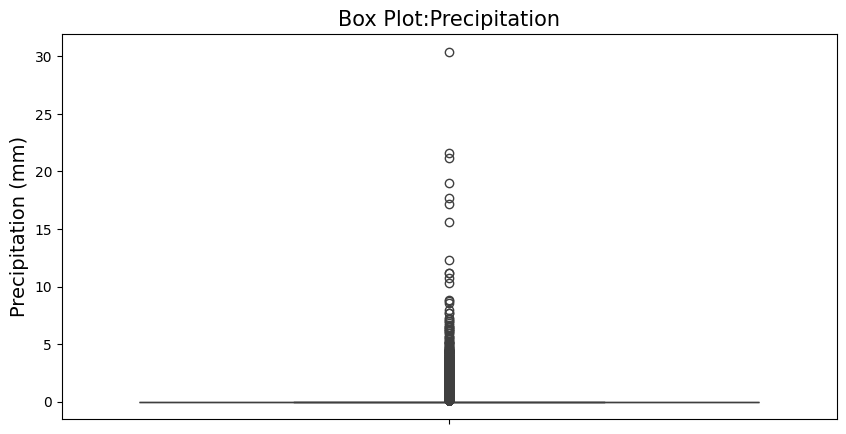

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(new_mein.prcp)
plt.title('Box Plot:Precipitation', fontsize=15)
plt.ylabel('Precipitation (mm)', fontsize=14)
plt.show()

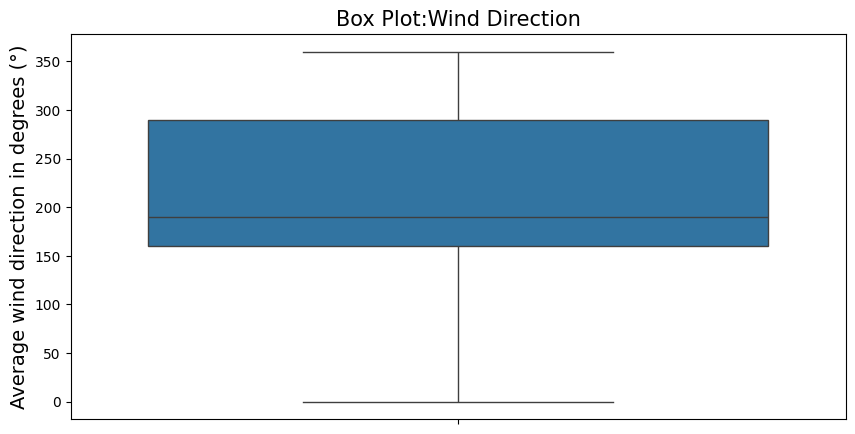

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(new_mein.wdir)
plt.title('Box Plot:Wind Direction', fontsize=15)
plt.ylabel('Average wind direction in degrees (°)', fontsize=14)
plt.show()

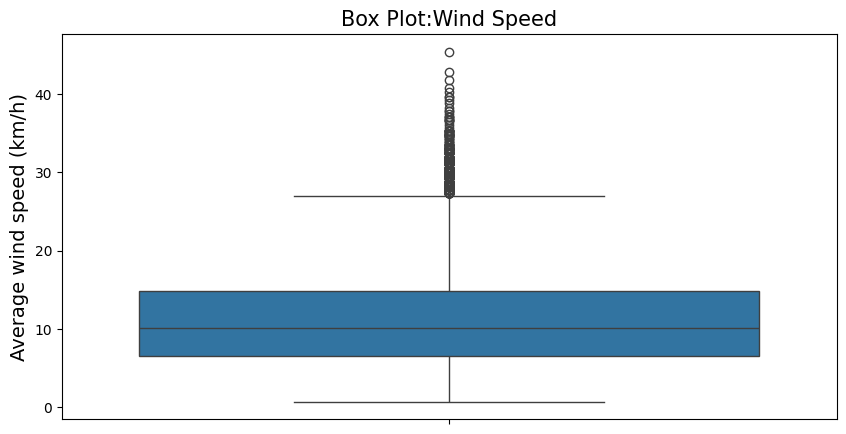

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(new_mein.wspd)
plt.title('Box Plot:Wind Speed', fontsize=15)
plt.ylabel('Average wind speed (km/h)', fontsize=14)
plt.show()

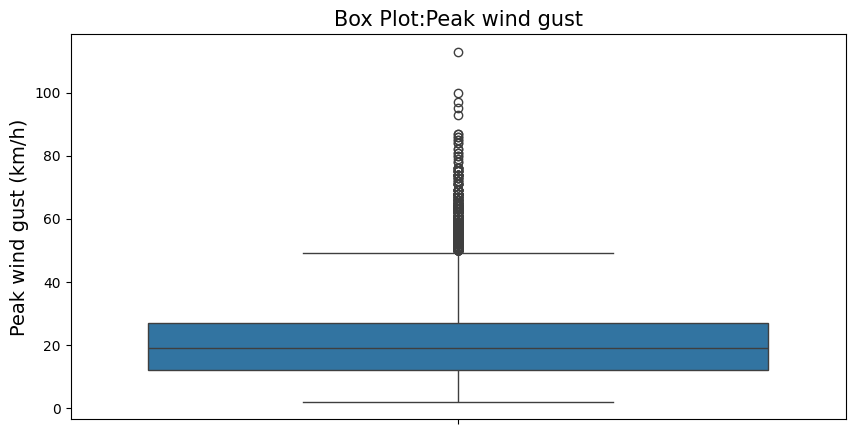

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(new_mein.wpgt)
plt.title('Box Plot:Peak wind gust', fontsize=15)
plt.ylabel('Peak wind gust (km/h)', fontsize=14)
plt.show()

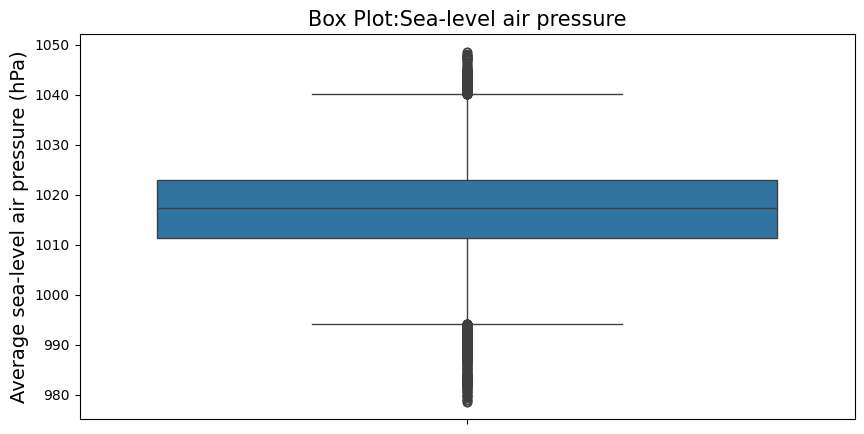

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(new_mein.pres)
plt.title('Box Plot:Sea-level air pressure', fontsize=15)
plt.ylabel('Average sea-level air pressure (hPa)', fontsize=14)
plt.show()

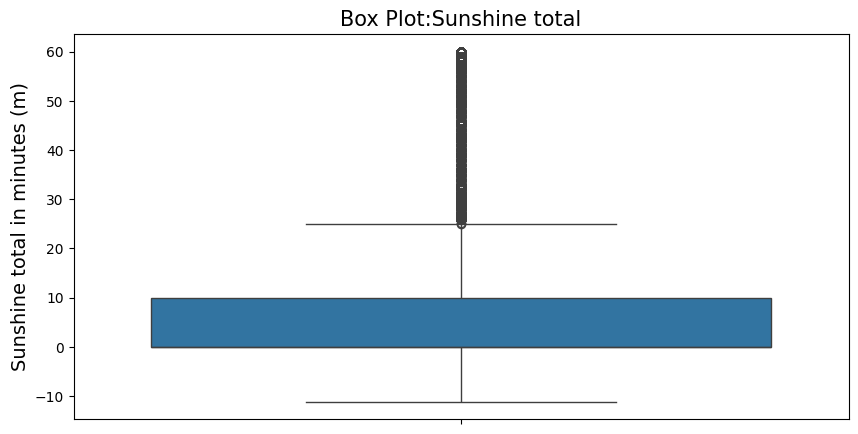

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(new_mein.tsun)
plt.title('Box Plot:Sunshine total', fontsize=15)
plt.ylabel('Sunshine total in minutes (m)', fontsize=14)
plt.show()

In [ ]:
new_mein["tsun"].max()

60.0

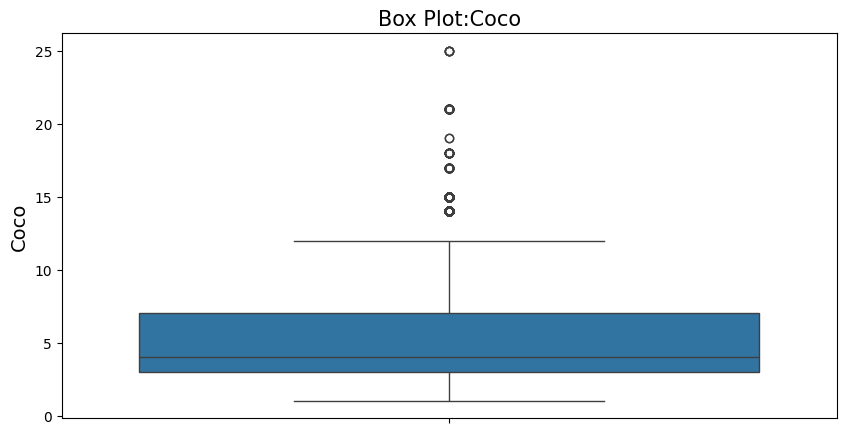

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(new_mein.coco)
plt.title('Box Plot:Coco', fontsize=15)
plt.ylabel('Coco', fontsize=14)
plt.show()

In [ ]:
mask_ntsun = new_mein['tsun'] > 0.0
new_mein[mask_ntsun]

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,coco
33,1.5,-2.6,74.0,0.0,320.0,20.5,39.0,1028.4,12.0,3.0
34,0.2,-1.6,88.0,0.3,320.0,27.4,55.0,1029.4,9.0,15.0
35,0.5,-2.4,81.0,0.1,320.0,25.6,46.0,1029.5,21.0,15.0
36,1.2,-6.6,56.0,0.1,340.0,28.8,60.0,1029.6,21.0,15.0
37,1.3,-7.0,54.0,0.0,340.0,33.5,63.0,1030.2,54.0,3.0
...,...,...,...,...,...,...,...,...,...,...
43787,7.3,2.8,73.0,0.0,250.0,23.4,49.0,1015.9,5.0,4.0
43788,7.8,2.9,71.0,0.0,250.0,22.7,42.0,1015.5,9.0,4.0
43789,7.8,2.3,68.0,0.0,250.0,22.0,44.0,1015.0,1.0,3.0
43790,8.1,2.5,68.0,0.0,240.0,15.8,32.0,1015.2,7.0,4.0


In [ ]:
mask_tsun = new_mein['tsun'] == 0.0
mask_prcp = new_mein['prcp'] ==0.0
new_mein[mask_tsun & mask_prcp]

,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,coco
0,6.2,3.5,83.0,0.0,240.0,7.9,15.0,1031.8,0.0,4.0
1,5.8,3.6,86.0,0.0,230.0,6.8,12.0,1031.2,0.0,4.0
2,5.6,3.1,84.0,0.0,210.0,7.9,15.0,1030.4,0.0,4.0
3,6.0,3.0,81.0,0.0,220.0,9.7,26.0,1029.4,0.0,4.0
4,6.2,3.0,80.0,0.0,240.0,8.6,21.0,1028.4,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...
43819,4.8,3.5,91.0,0.0,190.0,16.6,31.0,1006.0,0.0,4.0
43820,4.9,3.1,88.0,0.0,180.0,14.4,26.0,1007.0,0.0,4.0
43821,4.8,3.0,88.0,0.0,150.0,11.2,27.0,1007.2,0.0,3.0
43822,4.8,2.7,86.0,0.0,180.0,12.2,25.0,1007.0,0.0,3.0


LOF FOR WEATHER DATASET

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor


# Number of neighbors for LOF
n_neighbors = 20
contamination = 0.10
# Dictionary to store the percentage of outliers for each feature
outlier_percentages = {}

# Apply LOF to each feature
for feature in new_mein.columns:
# Reshape the data for LOF
 X = new_mein[[feature]].values

 # Fit the LOF model
 lof = LocalOutlierFactor(n_neighbors=n_neighbors)
 y_pred = lof.fit_predict(X)

 # Identify the outliers
 outliers = y_pred == -1

 # Calculate the percentage of outliers
 percentage_outliers = np.mean(outliers) * 100
 outlier_percentages[feature] = percentage_outliers

 print(f'Percentage of outliers in meiningen weather {feature}: {percentage_outliers:.2f}%')


Percentage of outliers in meiningen weather temp: 0.26%
Percentage of outliers in meiningen weather dwpt: 0.13%
Percentage of outliers in meiningen weather rhum: 0.05%
Percentage of outliers in meiningen weather prcp: 0.07%
Percentage of outliers in meiningen weather wdir: 0.18%
Percentage of outliers in meiningen weather wspd: 0.22%
Percentage of outliers in meiningen weather wpgt: 0.29%
Percentage of outliers in meiningen weather pres: 0.65%
Percentage of outliers in meiningen weather tsun: 0.19%
Percentage of outliers in meiningen weather coco: 0.09%


NAIVE BAYES FOR WEATHER DATASET

In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm


# Extract features
X = new_mein.values

# Fit Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X, np.zeros(X.shape[0]))  # Dummy target variable

# Calculate likelihoods for each data point
means = gnb.theta_
variances = gnb.var_
likelihoods = np.zeros(X.shape[0])

# Ensure means and variances are in correct shape
if means.ndim == 1:
    means = means.reshape(1, -1)
if variances.ndim == 1:
    variances = variances.reshape(1, -1)

# Calculate likelihoods for each data point
for i, x in enumerate(X):
    likelihood = 1
    for j in range(X.shape[1]):
        likelihood *= norm.pdf(x[j], loc=means[0][j], scale=np.sqrt(variances[0][j]))
    likelihoods[i] = likelihood

# Determine anomalies
threshold = np.percentile(likelihoods, 95)  # for example, consider the bottom 10% as anomalies
anomalies = np.where(likelihoods > threshold)[0]

# Calculate percentage of anomalies for each feature
anomalies_new_mein = new_mein.iloc[anomalies]
total_anomalies = len(anomalies)
total_data_points = len(new_mein)

# Calculate anomaly percentage for each feature
feature_anomalies_percentage = {}
for feature in new_mein.columns:
    feature_anomalies_count = (anomalies_new_mein[feature] != new_mein[feature].mode().iloc[0]).sum()
    feature_anomalies_percentage[feature] = (feature_anomalies_count / total_data_points) * 100

print("Number of anomalies detected:", total_anomalies)
print("Percentage of anomalies for each feature:")
for feature, percentage in feature_anomalies_percentage.items():
    print(f"{feature}: {percentage:.2f}%")


Number of anomalies detected: 2192
Percentage of anomalies for each feature:
temp: 5.00%
dwpt: 4.92%
rhum: 4.94%
prcp: 0.10%
wdir: 4.44%
wspd: 4.93%
wpgt: 4.89%
pres: 4.97%
tsun: 0.91%
coco: 1.19%


NAIVE BAYES FOR WEATHER DATASET

In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm



# Initialize a dictionary to store anomaly information for each feature
anomaly_info = {}

# Loop through each feature
for feature in new_mein.columns:
    # Extract the feature values
    X = new_mein[[feature]].values

    # Fit Gaussian Naive Bayes model
    gnb = GaussianNB()
    gnb.fit(X, np.zeros(X.shape[0]))  # Dummy target variable

    # Calculate likelihoods for each data point
    means = gnb.theta_
    variances = gnb.var_
    likelihoods = np.zeros(X.shape[0])

    # Ensure means and variances are in correct shape
    if means.ndim == 1:
        means = means.reshape(1, -1)
    if variances.ndim == 1:
        variances = variances.reshape(1, -1)

    # Calculate likelihoods for each data point
    for i, x in enumerate(X):
        likelihood = norm.pdf(x[0], loc=means[0][0], scale=np.sqrt(variances[0][0]))
        likelihoods[i] = likelihood

    # Determine anomalies using mean and standard deviation
    mean_likelihood = np.mean(likelihoods)
    std_likelihood = np.std(likelihoods)
    threshold = mean_likelihood - 2 * std_likelihood  # 2 standard deviations below the mean
    anomalies = np.where(likelihoods < threshold)[0]

    # Calculate percentage of anomalies for this feature
    total_anomalies = len(anomalies)
    total_data_points = len(new_mein)
    anomaly_percentage = (total_anomalies / total_data_points) * 100

    # Store the anomaly information
    anomaly_info[feature] = {
        'total_anomalies': total_anomalies,
        'anomaly_percentage': anomaly_percentage,
        'anomalies': anomalies
    }

# Print results
for feature, info in anomaly_info.items():
    print(f"Feature: {feature}")
    print(f"  Number of anomalies detected: {info['total_anomalies']}")
    print(f"  Percentage of anomalies: {info['anomaly_percentage']:.2f}%")



Feature: temp
  Number of anomalies detected: 1844
  Percentage of anomalies: 4.21%
Feature: dwpt
  Number of anomalies detected: 1678
  Percentage of anomalies: 3.83%
Feature: rhum
  Number of anomalies detected: 2712
  Percentage of anomalies: 6.19%
Feature: prcp
  Number of anomalies detected: 1626
  Percentage of anomalies: 3.71%
Feature: wdir
  Number of anomalies detected: 1662
  Percentage of anomalies: 3.79%
Feature: wspd
  Number of anomalies detected: 1933
  Percentage of anomalies: 4.41%
Feature: wpgt
  Number of anomalies detected: 2279
  Percentage of anomalies: 5.20%
Feature: pres
  Number of anomalies detected: 2905
  Percentage of anomalies: 6.63%
Feature: tsun
  Number of anomalies detected: 5622
  Percentage of anomalies: 12.83%
Feature: coco
  Number of anomalies detected: 2256
  Percentage of anomalies: 5.15%


AUTOENCODER FOR WEATHER DATA

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
#to save all features
features = new_mein.columns.tolist()
# DataFrame to store anomaly scores for each feature
anomaly_scores = pd.DataFrame(index=new_mein.index)

# Loop through each feature
for feature in features:
    # Scale the feature data
    scaler = MinMaxScaler()
    scaled_feature = scaler.fit_transform(new_mein[[feature]])

    # Define the autoencoder model
    model = Sequential([
        Dense(32, activation='relu', input_shape=(1,)),
        Dense(16, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
     #Train the autoencoder
    model.fit(scaled_feature, scaled_feature, epochs=50, batch_size=32, validation_split=0.1, verbose=0)

    # Get reconstruction loss
    reconstructed_feature = model.predict(scaled_feature)
    reconstruction_loss = np.mean(np.square(scaled_feature - reconstructed_feature), axis=1)

    # Store the reconstruction loss (anomaly score) in the DataFrame
    anomaly_scores[feature] = reconstruction_loss



1370/1370 [==============================] - 2s 1ms/step


In [ ]:

print(reconstruction_loss)
# Calculate the threshold as the 90th percentile of the reconstruction loss
threshold_auto_w = np.percentile(reconstruction_loss, 90)

    # Identify anomalies
anomalies_auto_w = reconstruction_loss > threshold_auto_w

for feature in features:
    anomalies_auto_w = anomaly_scores[feature] > threshold_auto_w
    anomaly_percentage_auto_w = np.mean(anomalies_auto_w) * 100
    print(f'Feature: {feature}, Anomaly Percentage: {anomaly_percentage_auto_w:.2f}%')


    # Store the reconstruction loss (anomaly score) in the DataFrame
anomaly_scores[feature] = reconstruction_loss


# Combine anomaly scores with original data for easier analysis
combined_data_auto_w = pd.concat([new_mein, anomaly_scores.add_suffix('_anomaly_score')], axis=1)

# Save the combined data with anomaly scores
combined_data_auto_w.to_csv('new_mein_with_anomaly_scores.csv', index=False)

# Display the first few rows of the combined data
combined_data_auto_w.head()






[1.45744623e-06 1.45744623e-06 1.45744623e-06 ... 1.15973386e-06
 1.15973386e-06 1.15973386e-06]
Feature: temp, Anomaly Percentage: 61.00%
Feature: dwpt, Anomaly Percentage: 12.66%
Feature: rhum, Anomaly Percentage: 41.62%
Feature: prcp, Anomaly Percentage: 1.60%
Feature: wdir, Anomaly Percentage: 71.56%
Feature: wspd, Anomaly Percentage: 1.84%
Feature: wpgt, Anomaly Percentage: 7.08%
Feature: pres, Anomaly Percentage: 31.08%
Feature: tsun, Anomaly Percentage: 16.46%
Feature: coco, Anomaly Percentage: 9.91%


,temp,dwpt,rhum,prcp,wdir,wspd,wpgt,pres,tsun,coco,temp_anomaly_score,dwpt_anomaly_score,rhum_anomaly_score,prcp_anomaly_score,wdir_anomaly_score,wspd_anomaly_score,wpgt_anomaly_score,pres_anomaly_score,tsun_anomaly_score,coco_anomaly_score
0,6.2,3.5,83.0,0.0,240.0,7.9,15.0,1031.8,0.0,4.0,0.000003,2.031032e-07,2.212535e-06,1.073726e-08,0.000021,2.118115e-09,6.131705e-08,0.000006,2.069845e-08,0.000001
1,5.8,3.6,86.0,0.0,230.0,6.8,12.0,1031.2,0.0,4.0,0.000004,2.369323e-07,4.759031e-07,1.073726e-08,0.000034,1.484084e-07,2.737095e-08,0.000001,2.069845e-08,0.000001
2,5.6,3.1,84.0,0.0,210.0,7.9,15.0,1030.4,0.0,4.0,0.000004,1.181657e-07,8.188177e-06,1.073726e-08,0.000035,2.118115e-09,6.131705e-08,0.000002,2.069845e-08,0.000001
3,6.0,3.0,81.0,0.0,220.0,9.7,26.0,1029.4,0.0,4.0,0.000004,1.062135e-07,1.132916e-09,1.073726e-08,0.000039,5.886020e-07,7.065743e-07,0.000026,2.069845e-08,0.000001
4,6.2,3.0,80.0,0.0,240.0,8.6,21.0,1028.4,0.0,4.0,0.000003,1.062135e-07,3.232206e-08,1.073726e-08,0.000021,1.226268e-07,1.316737e-06,0.000047,2.069845e-08,0.000001


APLYING XGBOOST ON WEATHER DATASET

In [ ]:

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Sample Data (Replace with your dataset)
# Assuming a dataframe with 100 rows and 10 features


# Define anomaly detection function
def detect_anomalies(Mun_df):
    anomalies = pd.DataFrame(index=Mun_df.index)
    anomaly_percentages = {}

    for feature in Mun_df.columns:
        X = Mun_df.drop(columns=[feature])
        y = Mun_df[feature]

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train XGBoost model
        model = XGBRegressor()
        model.fit(X_train, y_train)

        # Predict on the whole dataset
        y_pred = model.predict(X)

        # Calculate prediction errors
        errors = np.abs(y - y_pred)

        # Determine dynamic threshold using standard deviation
        mean_error = np.mean(errors)
        std_error = np.std(errors)
        threshold = mean_error + 2 * std_error  # Consider 2 standard deviations from the mean

        # Flag anomalies
        anomaly_flags = errors > threshold
        anomalies[feature] = anomaly_flags

        # Calculate anomaly percentage
        anomaly_percentages[feature] = (anomaly_flags.sum() / len(Mun_df)) * 100

        # Print summary
        print(f"Feature: {feature}")
        print(f"Threshold: {threshold:.4f}")
        print(f"Anomalies detected: {anomaly_flags.sum()}/{len(Mun_df)} ({anomaly_percentages[feature]:.2f}%)")
        print("-" * 40)

    return anomalies, anomaly_percentages

# Detect anomalies
anomalies_df, anomaly_percentages = detect_anomalies(new_mein)


# Print anomaly percentages
print("\nAnomaly Percentages per Feature:")
for feature, percentage in anomaly_percentages.items():
    print(f"{feature}: {percentage:.2f}%")


Feature: temp
Threshold: 0.3069
Anomalies detected: 1758/43824 (4.01%)
----------------------------------------
Feature: dwpt
Threshold: 0.3058
Anomalies detected: 1461/43824 (3.33%)
----------------------------------------
Feature: rhum
Threshold: 2.5393
Anomalies detected: 2006/43824 (4.58%)
----------------------------------------
Feature: prcp
Threshold: 0.5951
Anomalies detected: 752/43824 (1.72%)
----------------------------------------
Feature: wdir
Threshold: 151.7479
Anomalies detected: 2335/43824 (5.33%)
----------------------------------------
Feature: wspd
Threshold: 2.9511
Anomalies detected: 1746/43824 (3.98%)
----------------------------------------
Feature: wpgt
Threshold: 5.4786
Anomalies detected: 1622/43824 (3.70%)
----------------------------------------
Feature: pres
Threshold: 13.6418
Anomalies detected: 2204/43824 (5.03%)
----------------------------------------
Feature: tsun
Threshold: 24.1073
Anomalies detected: 2586/43824 (5.90%)
------------------------------

IRRADIATION DATASET

In [ ]:
import pandas as pd
import requests
#importing irradiation data for Meiningen
# URL of the webpage containing JSON data
url = "http://139.174.11.24/data?dataset=irradiationdataforcities&start=2019-01-01&end=2023-12-31&cityName=Meiningen"

# Fetch the data from the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse JSON data
    data = response.json()

    # Convert the data to a DataFrame
    df_irrad = pd.DataFrame.from_dict(data, orient='index')

     # Reset the index to convert the timestamp to a column
    df_irrad.reset_index(inplace=True)


else:
    print("Failed to fetch data. Status code:", response.status_code)


In [ ]:
df_irrad.head()

,index,time,Observation period,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI,GHI,BHI,DHI,BNI,Reliability,cityName
0,1546300800000,2019-01-01 00:00:00,2019-01-01T00:00:00.0/2019-01-01T00:15:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,Meiningen
1,1546301700000,2019-01-01 00:15:00,2019-01-01T00:15:00.0/2019-01-01T00:30:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,Meiningen
2,1546302600000,2019-01-01 00:30:00,2019-01-01T00:30:00.0/2019-01-01T00:45:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,Meiningen
3,1546303500000,2019-01-01 00:45:00,2019-01-01T00:45:00.0/2019-01-01T01:00:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,Meiningen
4,1546304400000,2019-01-01 01:00:00,2019-01-01T01:00:00.0/2019-01-01T01:15:00.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,Meiningen


In [ ]:

# drop unwanted columns
clean_df = df_irrad.drop(columns = ["time", "Observation period", "Reliability", "cityName","index"])
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175296 entries, 0 to 175295
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TOA            175296 non-null  object 
 1   Clear sky GHI  175296 non-null  object 
 2   Clear sky BHI  175296 non-null  object 
 3   Clear sky DHI  175296 non-null  object 
 4   Clear sky BNI  175296 non-null  object 
 5   GHI            175296 non-null  float64
 6   BHI            175296 non-null  object 
 7   DHI            175296 non-null  object 
 8   BNI            175296 non-null  object 
dtypes: float64(1), object(8)
memory usage: 12.0+ MB


In [ ]:
clean_df.isnull().sum()

TOA              0
Clear sky GHI    0
Clear sky BHI    0
Clear sky DHI    0
Clear sky BNI    0
GHI              0
BHI              0
DHI              0
BNI              0
dtype: int64

In [ ]:
clean_df.head()

,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI,GHI,BHI,DHI,BNI
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000


In [ ]:
df_m = clean_df.select_dtypes("object").astype("float")

In [ ]:
df_m["GHI"] = clean_df["GHI"]

In [ ]:
df_m.describe()

,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI,BHI,DHI,BNI,GHI
count,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000,175296.000000
mean,70.417242,50.353265,39.096373,11.256892,79.215770,17.524089,16.147798,34.607127,33.671886
std,91.254302,69.101131,56.491335,14.288586,90.195576,39.466201,24.607701,64.480515,54.318632
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.508850,0.623300,0.042100,0.567500,0.651050,0.000000,0.491750,0.000000,0.525700
75%,132.650250,91.459725,68.118775,21.208375,176.843525,8.282100,24.711400,34.991050,47.450325
max,293.320900,238.095000,214.596400,87.462400,255.669500,213.569400,127.599700,255.669500,238.095000


In [ ]:
# mask = df_m.all(df_m['GHI'] == 0.0 and df_m['TOA'] == 0.0 and df_m['DHI'] == 0.0 and df_m['BNI'] == 0.0 and
#         df_m['BHI'] == 0.0 and df_m['Clear sky GHI'] == 0.0 and df_m['Clear sky DHI'] == 0.0 and
#         df_m['Clear sky BNI'] == 0.0 and df_m['Clear sky BHI']==0.0)
# df_m[mask]

In [ ]:
result = (df_m['GHI'] == 0.0) & (df_m['TOA'] == 0.0) & (df_m['DHI'] == 0.0) & (df_m['BNI'] == 0.0) & \
         (df_m['BHI'] == 0.0) & (df_m['Clear sky GHI'] == 0.0) & (df_m['Clear sky DHI'] == 0.0) & \
         (df_m['Clear sky BNI'] == 0.0) & (df_m['Clear sky BHI'] == 0.0)

df_m[result]


,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI,BHI,DHI,BNI,GHI
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
175291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
round((len(df_m[result])/len(df_m)) *100, 2)

48.82

In [ ]:
#Get the percentage of null values in the dataset
df_m.isnull().sum() /len(df_m) *(100)

TOA              0.0
Clear sky GHI    0.0
Clear sky BHI    0.0
Clear sky DHI    0.0
Clear sky BNI    0.0
BHI              0.0
DHI              0.0
BNI              0.0
GHI              0.0
dtype: float64

In [ ]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175296 entries, 0 to 175295
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TOA            175296 non-null  float64
 1   Clear sky GHI  175296 non-null  float64
 2   Clear sky BHI  175296 non-null  float64
 3   Clear sky DHI  175296 non-null  float64
 4   Clear sky BNI  175296 non-null  float64
 5   BHI            175296 non-null  float64
 6   DHI            175296 non-null  float64
 7   BNI            175296 non-null  float64
 8   GHI            175296 non-null  float64
dtypes: float64(9)
memory usage: 12.0 MB


In [ ]:

# Check if -99999 exists in all columns and print columns where it exists
columns_with_value = df_m.apply(lambda col: col.name if -99999 in col.values else None).dropna()

if len(columns_with_value) > 0:
    print(f"The value '{-99999}' exists in the following columns:")
    for col in columns_with_value:
        print(col)
else:
    print(f"The value '{-99999}' does not exist in any column.")

The value '-99999' does not exist in any column.


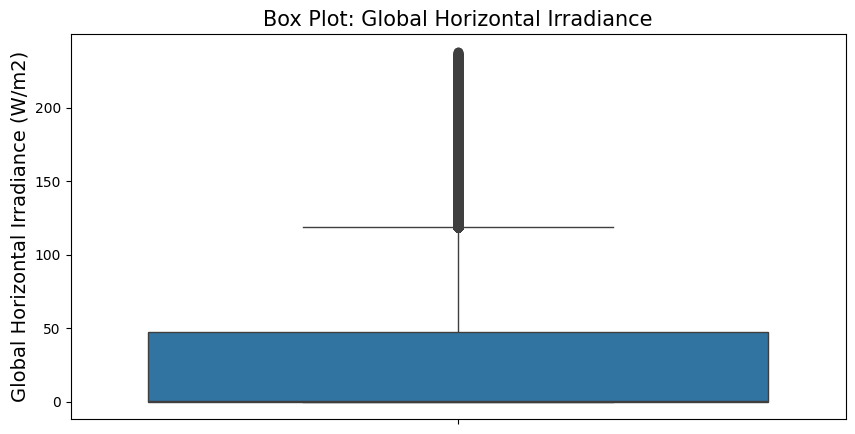

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(10,5))
sns.boxplot(df_m.GHI)
plt.title('Box Plot: Global Horizontal Irradiance', fontsize=15)
plt.ylabel('Global Horizontal Irradiance (W/m2)', fontsize=14)
plt.show()

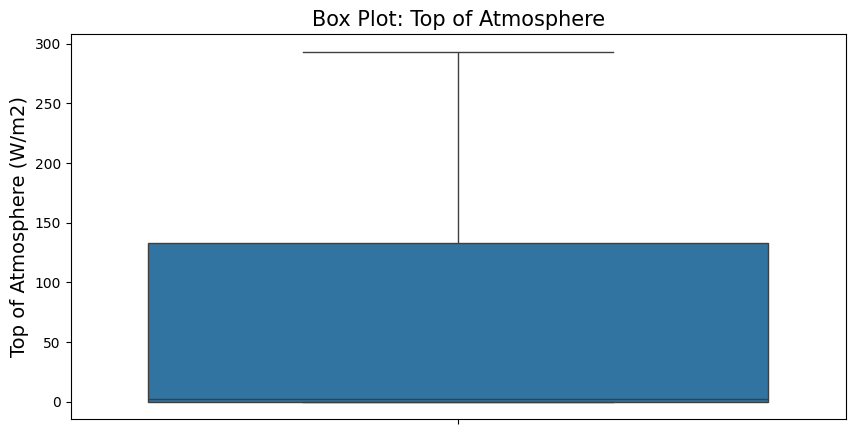

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(df_m["TOA"])
plt.title('Box Plot: Top of Atmosphere', fontsize=15)
plt.ylabel('Top of Atmosphere (W/m2)', fontsize=14)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Number of neighbors for LOF
n_neighbors = 20
contamination = 0.10
# Dictionary to store the percentage of outliers for each feature
outlier_percentages = {}

# Apply LOF to each feature
for feature in df_m.columns:
# Reshape the data for LOF
 X = df_m[[feature]].values

 # Fit the LOF model
 lof = LocalOutlierFactor(n_neighbors=n_neighbors)
 y_pred = lof.fit_predict(X)

 # Identify the outliers
 outliers = y_pred == -1

 # Calculate the percentage of outliers
 percentage_outliers = np.mean(outliers) * 100
 outlier_percentages[feature] = percentage_outliers

 print(f'Percentage of outliers in meiningen Irradiation in {feature}: {percentage_outliers:.2f}%')

Percentage of outliers in meiningen Irradiation in TOA: 0.03%
Percentage of outliers in meiningen Irradiation in Clear sky GHI: 0.00%
Percentage of outliers in meiningen Irradiation in Clear sky BHI: 0.07%
Percentage of outliers in meiningen Irradiation in Clear sky DHI: 0.02%
Percentage of outliers in meiningen Irradiation in Clear sky BNI: 0.01%
Percentage of outliers in meiningen Irradiation in BHI: 0.12%
Percentage of outliers in meiningen Irradiation in DHI: 0.01%
Percentage of outliers in meiningen Irradiation in BNI: 0.10%
Percentage of outliers in meiningen Irradiation in GHI: 0.01%


USING NAIVE BAYES ON IRRADIATION DATASET

In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm


# Step 1: Check and Convert Data Types
# Convert all columns to numeric (float64)
df_m = df_m.apply(pd.to_numeric, errors='coerce')

# Step 2: Handle Missing Values
df_m = df_m.dropna()  # Drop rows with NaN values

# Extract features
X = df_m.values

# Fit Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X, np.zeros(X.shape[0]))  # Dummy target variable

# Calculate likelihoods for each data point
means = gnb.theta_
variances = np.var(X, axis=0) + 1e-9  # Adding a small value for numerical stability

likelihoods = np.zeros(X.shape[0])

# Ensure means and variances are in correct shape
if means.ndim == 1:
    means = means.reshape(1, -1)
if variances.ndim == 1:
    variances = variances.reshape(1, -1)

# Calculate likelihoods for each data point
for i, x in enumerate(X):
    likelihood = 1
    for j in range(X.shape[1]):
        likelihood *= norm.pdf(x[j], loc=means[0][j], scale=np.sqrt(variances[0][j]))
    likelihoods[i] = likelihood

# Determine anomalies
threshold = np.percentile(likelihoods, 10)  # for example, consider the bottom 10% as anomalies
anomalies = np.where(likelihoods < threshold)[0]

# Calculate percentage of anomalies for each feature
anomalies_df_m = df_m.iloc[anomalies]
total_anomalies = len(anomalies)
total_data_points = len(df_m)

# Calculate anomaly percentage for each feature
feature_anomalies_percentage = {}
for feature in df_m.columns:
    feature_anomalies_count = (anomalies_df_m[feature] != df_m[feature].mode().iloc[0]).sum()
    feature_anomalies_percentage[feature] = (feature_anomalies_count / total_data_points) * 100

print("Number of anomalies detected:", total_anomalies)
print("Percentage of anomalies for each feature:")
for feature, percentage in feature_anomalies_percentage.items():
    print(f"{feature}: {percentage:.2f}%")


Number of anomalies detected: 17530
Percentage of anomalies for each feature:
TOA: 10.00%
Clear sky GHI: 10.00%
Clear sky BHI: 10.00%
Clear sky DHI: 10.00%
Clear sky BNI: 10.00%
BHI: 9.99%
DHI: 10.00%
BNI: 9.99%
GHI: 10.00%


In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from scipy.stats import norm


# Initialize a dictionary to store anomaly information for each feature
anomaly_info = {}

# Loop through each feature
for feature in df_m.columns:
    # Extract the feature values
    X = df_m[[feature]].values

    # Fit Gaussian Naive Bayes model
    gnb = GaussianNB()
    gnb.fit(X, np.zeros(X.shape[0]))  # Dummy target variable

    # Calculate likelihoods for each data point
    means = gnb.theta_
    variances = gnb.var_
    likelihoods = np.zeros(X.shape[0])

    # Ensure means and variances are in correct shape
    if means.ndim == 1:
        means = means.reshape(1, -1)
    if variances.ndim == 1:
        variances = variances.reshape(1, -1)

    # Calculate likelihoods for each data point
    for i, x in enumerate(X):
        likelihood = norm.pdf(x[0], loc=means[0][0], scale=np.sqrt(variances[0][0]))
        likelihoods[i] = likelihood

    # Determine anomalies using mean and standard deviation
    mean_likelihood = np.mean(likelihoods)
    std_likelihood = np.std(likelihoods)
    threshold = mean_likelihood - 2 * std_likelihood  # 2 standard deviations below the mean
    anomalies = np.where(likelihoods < threshold)[0]

    # Calculate percentage of anomalies for this feature
    total_anomalies = len(anomalies)
    total_data_points = len(df_m)
    anomaly_percentage = (total_anomalies / total_data_points) * 100

    # Store the anomaly information
    anomaly_info[feature] = {
        'total_anomalies': total_anomalies,
        'anomaly_percentage': anomaly_percentage,
        'anomalies': anomalies
    }

# Print results
for feature, info in anomaly_info.items():
    print(f"Feature: {feature}")
    print(f"  Number of anomalies detected: {info['total_anomalies']}")
    print(f"  Percentage of anomalies: {info['anomaly_percentage']:.2f}%")



Feature: TOA
  Number of anomalies detected: 16221
  Percentage of anomalies: 9.25%
  Anomaly indices: [  8397   8492   8493 ... 164588 164589 164590]

Feature: Clear sky GHI
  Number of anomalies detected: 17048
  Percentage of anomalies: 9.73%
  Anomaly indices: [  7436   7437   7438 ... 165068 165069 165070]

Feature: Clear sky BHI
  Number of anomalies detected: 17324
  Percentage of anomalies: 9.88%
  Anomaly indices: [  7339   7340   7341 ... 166030 166031 166032]

Feature: Clear sky DHI
  Number of anomalies detected: 13552
  Percentage of anomalies: 7.73%
  Anomaly indices: [  5892   5893   5894 ... 167560 167561 167562]

Feature: Clear sky BNI
  Number of anomalies detected: 7643
  Percentage of anomalies: 4.36%
  Anomaly indices: [  1675   1676   1677 ... 168143 168144 168145]

Feature: BHI
  Number of anomalies detected: 15823
  Percentage of anomalies: 9.03%
  Anomaly indices: [  3312   4275   4276 ... 168613 168614 169869]

Feature: DHI
  Number of anomalies detected: 1581

AUTO ENCODER FOR IRRADIATION DATASET

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential



#to save all features
features_auto_i = df_m.columns.tolist()


# DataFrame to store anomaly scores for each feature
anomaly_scores_auto_i = pd.DataFrame(index=df_m.index)

# Loop through each feature
for feature in features_auto_i :
    # Scale the feature data
    scaler = MinMaxScaler()
    scaled_feature_auto_i  = scaler.fit_transform(df_m[[feature]])

    # Define the autoencoder model
    model_auto_i  = Sequential([
        Dense(32, activation='relu', input_shape=(1,)),
        Dense(16, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model_auto_i .compile(optimizer='adam', loss='mean_squared_error')

     #Train the autoencoder
    model_auto_i.fit(scaled_feature_auto_i , scaled_feature_auto_i , epochs=50, batch_size=32, validation_split=0.1, verbose=0)

    # Get reconstruction loss
    reconstructed_feature_auto_i  = model_auto_i.predict(scaled_feature_auto_i)
    reconstruction_loss_auto_i  = np.mean(np.square(scaled_feature_auto_i  - reconstructed_feature_auto_i), axis=1)

    # Store the reconstruction loss (anomaly score) in the DataFrame
    anomaly_scores_auto_i [feature] = reconstruction_loss_auto_i



5478/5478 [==============================] - 9s 2ms/step


In [ ]:

print(reconstruction_loss_auto_i)
# Calculate the threshold as the 90th percentile of the reconstruction loss
threshold_auto_i = np.percentile(reconstruction_loss_auto_i, 90)

    # Identify anomalies
anomalies_auto_i = reconstruction_loss_auto_i > threshold_auto_i

for feature in features_auto_i:
    anomalies_auto_i = anomaly_scores_auto_i[feature] > threshold_auto_i
    anomaly_percentage_auto_i = np.mean(anomalies_auto_i) * 100
    print(f'Feature: {feature}, Anomaly Percentage: {anomaly_percentage_auto_i:.2f}%')


    # Store the reconstruction loss (anomaly score) in the DataFrame
anomaly_scores_auto_i[feature] = reconstruction_loss_auto_i


# Combine anomaly scores with original data for easier analysis
combined_data_auto_i = pd.concat([df_m, anomaly_scores_auto_i.add_suffix('_anomaly_score')], axis=1)

# Save the combined data with anomaly scores
combined_data_auto_i.to_csv('df_m_with_anomaly_scores_auto_i.csv', index=False)

# Display the first few rows of the combined data
combined_data_auto_i.head()






[2.75603138e-08 2.75603138e-08 2.75603138e-08 ... 2.75603138e-08
 2.75603138e-08 2.75603138e-08]
Feature: TOA, Anomaly Percentage: 90.99%
Feature: Clear sky GHI, Anomaly Percentage: 48.52%
Feature: Clear sky BHI, Anomaly Percentage: 2.19%
Feature: Clear sky DHI, Anomaly Percentage: 1.09%
Feature: Clear sky BNI, Anomaly Percentage: 22.82%
Feature: BHI, Anomaly Percentage: 17.87%
Feature: DHI, Anomaly Percentage: 32.32%
Feature: BNI, Anomaly Percentage: 25.79%
Feature: GHI, Anomaly Percentage: 10.00%


,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI,BHI,DHI,BNI,GHI,TOA_anomaly_score,Clear sky GHI_anomaly_score,Clear sky BHI_anomaly_score,Clear sky DHI_anomaly_score,Clear sky BNI_anomaly_score,BHI_anomaly_score,DHI_anomaly_score,BNI_anomaly_score,GHI_anomaly_score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000004,2.048933e-08,2.165872e-09,6.727088e-09,1.084399e-08,2.956591e-08,6.517400e-09,2.726646e-08,2.756031e-08
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000004,2.048933e-08,2.165872e-09,6.727088e-09,1.084399e-08,2.956591e-08,6.517400e-09,2.726646e-08,2.756031e-08
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000004,2.048933e-08,2.165872e-09,6.727088e-09,1.084399e-08,2.956591e-08,6.517400e-09,2.726646e-08,2.756031e-08
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000004,2.048933e-08,2.165872e-09,6.727088e-09,1.084399e-08,2.956591e-08,6.517400e-09,2.726646e-08,2.756031e-08
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000004,2.048933e-08,2.165872e-09,6.727088e-09,1.084399e-08,2.956591e-08,6.517400e-09,2.726646e-08,2.756031e-08


In [ ]:
# import numpy as np
# import pandas as pd
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from keras.models import Sequential


# #to save all features
# features_auto_i = df_m.columns.tolist()


# # DataFrame to store anomaly scores for each feature
# anomaly_scores_auto_i = pd.DataFrame(index=df_m.index)

# # Loop through each feature
# for feature in features_auto_i:
#     # Scale the feature data
#     scaler = MinMaxScaler()
#     scaled_feature_auto_i = scaler.fit_transform(df_m[[feature]])

#     # Define the autoencoder model
#     model_auto_i = Sequential([
#         Dense(32, activation='relu', input_shape=(1,)),
#         Dense(16, activation='relu'),
#         Dense(32, activation='relu'),
#         Dense(1, activation='sigmoid')
#     ])

#     model_auto_i.compile(optimizer='adam', loss='mean_squared_error')

#      #Train the autoencoder
#     model_auto_i.fit(scaled_feature_auto_i, scaled_feature_auto_i, epochs=50, batch_size=32, validation_split=0.1, verbose=0)

#     # Get reconstruction loss
#     reconstructed_feature_auto_i = model_auto_i.predict(scaled_feature_auto_i)
#     reconstruction_loss_auto_i = np.mean(np.square(scaled_feature_auto_i - reconstructed_feature_auto_i), axis=1)

#     # Store the reconstruction loss (anomaly score) in the DataFrame
#     #anomaly_scores[feature] = reconstruction_loss_auto_i

# # # Combine anomaly scores with original data for easier analysis
# # combined_data = pd.concat([new_mein, anomaly_scores.add_suffix('_anomaly_score')], axis=1)

# # # Save the combined data with anomaly scores
# # combined_data.to_csv('new_mein_with_anomaly_scores.csv', index=False)

# # # Display the first few rows of the combined data
# # combined_data.head()

5478/5478 [==============================] - 8s 1ms/step


In [ ]:
print(reconstruction_loss_auto_i)
 # Calculate the threshold as the 90th percentile of the reconstruction loss
threshold_auto_i = np.percentile(reconstruction_loss_auto_i, 90)

#     # Identify anomalies
anomalies_auto_i = reconstruction_loss_auto_i > threshold_auto_i

for feature in features_auto_i:
    anomalies_auto_i = anomaly_scores_auto_i[feature] > threshold_auto_i
    anomaly_percentage_auto_i = np.mean(anomalies_auto_i) * 100
    print(f'Feature: {feature}, Anomaly Percentage: {anomaly_percentage_auto_i:.2f}%')


#     # Store the reconstruction loss (anomaly score) in the DataFrame
# anomaly_scores_auto_i[feature] = reconstruction_loss_auto_i


# # Combine anomaly scores with original data for easier analysis
# combined_data_auto_i = pd.concat([rost_clean_df, anomaly_scores_auto_i.add_suffix('_anomaly_score')], axis=1)

# # Save the combined data with anomaly scores
# combined_data_auto_i.to_csv('rost_clean_df_with_anomaly_scores_auto_i.csv', index=False)

# # Display the first few rows of the combined data
# combined_data_auto_i.head()


[5.2474628e-08 5.2474628e-08 5.2474628e-08 ... 5.2474628e-08 5.2474728e-08
 5.2474728e-08]
Feature: TOA, Anomaly Percentage: 10.00%


KeyError: 'Clear sky GHI'

APPLYING XGBOOST ON IRRADIATION DATASET

In [ ]:

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Sample Data (Replace with your dataset)
# Assuming a dataframe with 100 rows and 10 features


# Define anomaly detection function
def detect_anomalies(Mun_df):
    anomalies = pd.DataFrame(index=Mun_df.index)
    anomaly_percentages = {}

    for feature in Mun_df.columns:
        X = Mun_df.drop(columns=[feature])
        y = Mun_df[feature]

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train XGBoost model
        model = XGBRegressor()
        model.fit(X_train, y_train)

        # Predict on the whole dataset
        y_pred = model.predict(X)

        # Calculate prediction errors
        errors = np.abs(y - y_pred)

        # Determine dynamic threshold using standard deviation
        mean_error = np.mean(errors)
        std_error = np.std(errors)
        threshold = mean_error + 2 * std_error  # Consider 2 standard deviations from the mean

        # Flag anomalies
        anomaly_flags = errors > threshold
        anomalies[feature] = anomaly_flags

        # Calculate anomaly percentage
        anomaly_percentages[feature] = (anomaly_flags.sum() / len(Mun_df)) * 100

        # Print summary
        print(f"Feature: {feature}")
        print(f"Threshold: {threshold:.4f}")
        print(f"Anomalies detected: {anomaly_flags.sum()}/{len(Mun_df)} ({anomaly_percentages[feature]:.2f}%)")
        print("-" * 40)

    return anomalies, anomaly_percentages

# Detect anomalies
anomalies_df, anomaly_percentages = detect_anomalies(df_m)


# Print anomaly percentages
print("\nAnomaly Percentages per Feature:")
for feature, percentage in anomaly_percentages.items():
    print(f"{feature}: {percentage:.2f}%")


Feature: TOA
Threshold: 1.9787
Anomalies detected: 9775/175296 (5.58%)
----------------------------------------
Feature: Clear sky GHI
Threshold: 1.0166
Anomalies detected: 9879/175296 (5.64%)
----------------------------------------
Feature: Clear sky BHI
Threshold: 0.9155
Anomalies detected: 9866/175296 (5.63%)
----------------------------------------
Feature: Clear sky DHI
Threshold: 1.2700
Anomalies detected: 9636/175296 (5.50%)
----------------------------------------
Feature: Clear sky BNI
Threshold: 4.3051
Anomalies detected: 10004/175296 (5.71%)
----------------------------------------
Feature: BHI
Threshold: 0.9432
Anomalies detected: 9381/175296 (5.35%)
----------------------------------------
Feature: DHI
Threshold: 1.1989
Anomalies detected: 8636/175296 (4.93%)
----------------------------------------
Feature: BNI
Threshold: 2.6727
Anomalies detected: 8809/175296 (5.03%)
----------------------------------------
Feature: GHI
Threshold: 1.2000
Anomalies detected: 8249/175296 